# H and P- refinement for alternative blending function
by JN Hayek (Created on 09.12.2021)


In [1]:
import os, sys, math, time

from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter, MaxNLocator


sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *


#=================== Plotting style ===================
plt.style.use('science')

from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib.legend_handler import HandlerBase

#definition of colormap
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5_r as LineColor

cmap = ListedColormap(LineColor.mpl_colors[:])

In [2]:
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax
# Save into a class the 



In [3]:

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
def FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE):
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# Timestamp variable
start_time = time.time()

In [5]:
# Save into a class the 
class TPV3reference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and 
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

In [6]:
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/CorrectedSimulations/20220328_F7/"

# Reference saved into a list of objects
###################################################################
###################### Reference solution
###################################################################
pathRef = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/References/"
# Reference saved into a list of objects
RefList = [SSCreference(pathRef + "Kostrov/Kos_sem2dpack-{}-receiver-0.txt", "0km"),
           SSCreference(pathRef + "Kostrov/Kos_sem2dpack-{}-receiver-1.txt", "2km"),
           SSCreference(pathRef + "Kostrov/Kos_sem2dpack-{}-receiver-2.txt", "4km"),
           SSCreference(pathRef + "Kostrov/Kos_sem2dpack-{}-receiver-3.txt", "6km"),
           SSCreference(pathRef + "Kostrov/Kos_sem2dpack-{}-receiver-4.txt", "8km"),
          ]
# Reference saved into a list of objects
RefListTPV =  [TPV3reference(pathRef + "TPV3/TPV_sem2dpack-{}-receiver-0.0e+00.txt", "0km"),
               TPV3reference(pathRef + "TPV3/TPV_sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathRef + "TPV3/TPV_sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathRef + "TPV3/TPV_sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathRef + "TPV3/TPV_sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]
###################################################################
###################### Reference solution
###################################################################


In [7]:
def PlotReceiverFile(ax, ReceiverFile, ColIDX, OrderPeriodicity=8, NumReceivers=3, filtering=True, **kwargs):
    ylabeldict={1:"Slip [m]", 2:"Slip rate [m/s]", 3:"$\mu$"}
    
    if(filtering):
        CutoffFrequency = kwargs.get("CutoffFrequency",7)
        kwargs.pop("CutoffFrequency")
        
        SamplingFrequency = 1./(ReceiverFile[0][1]-ReceiverFile[0][0])
        [ax.plot(ReceiverFile[0], 
                 Butterworth(ReceiverFile[ColIDX+OrderPeriodicity*i],SamplingFrequency = SamplingFrequency, CutoffFrequency = CutoffFrequency, **kwargs),color = cmap.colors[i], linewidth=2,
                 zorder=2,**kwargs) for i in range(NumReceivers)]
    else:
        [ax.plot(ReceiverFile[0], ReceiverFile[ColIDX+OrderPeriodicity*i],color= cmap.colors[i], linewidth=2, zorder=2,**kwargs) for i in range(NumReceivers)]
        
    ax.set_ylabel(ylabeldict[ColIDX])
    ax.set_xlabel("time [s]")
    return ax

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(0.0,7.0)
        ax.set_ylim(-0.5,7.0)
        
        
    Lines = fig.axes[-1].get_lines()[-4:]
    
    legend2 = fig.axes[-1].legend(Lines, ['Reference', '4 km', '6 km', '8 km'], loc=1)
    fig.axes[-1].add_artist(legend2)

def GenericFigAxis():
    fig = plt.figure(constrained_layout=True, figsize=[12,5], dpi = 300)
    gs = GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]

### Function for plotting 2 sets of graphs (filtered/unfiltered) from a ReceiverCP file

In [8]:
def PlotReceiverCP_wPandas(ReceiverFile, ParamsText, RefList, **kwargs):
    sliporsliprateDict={"Slip":1, "SlipRate": 2}
    
    #================= Plotting Filtered Set ===================#
    fig, axis = GenericFigAxis()
    PlotType = "Slip"
    [item.PlotReference(axis[0], PlotType, filtering=True, **kwargs) for item in RefList] #Reference
    PlotReceiverFile(axis[0], ReceiverFile, sliporsliprateDict[PlotType], filtering = True, **kwargs)

    PlotType = "SlipRate"
    [item.PlotReference(axis[1], PlotType, filtering=True, **kwargs) for item in RefList] #Reference
    PlotReceiverFile(axis[1], ReceiverFile, sliporsliprateDict[PlotType], filtering = True, **kwargs)

    format_axes(fig)
    
    if "CutoffFrequency" in kwargs:
        fig.suptitle("[TPV3] Filtered results ($f_c=${}$Hz$) {}".format(kwargs.get("CutoffFrequency"),ParamsText))
    else:
        fig.suptitle("[TPV3] Filtered results ($f_c=7Hz$) {}".format(ParamsText))

    #================= Plotting Non-Filtered Set ===================#
    fig, axis = GenericFigAxis()

    PlotType = "Slip"
    [item.PlotReference(axis[0], PlotType, filtering=False) for item in RefList] #Reference
    PlotReceiverFile(axis[0], ReceiverFile, sliporsliprateDict[PlotType], filtering = False)

    PlotType = "SlipRate"
    [item.PlotReference(axis[1], PlotType, filtering=False) for item in RefList] #Reference
    PlotReceiverFile(axis[1], ReceiverFile, sliporsliprateDict[PlotType], filtering = False)

    format_axes(fig)
    fig.suptitle("[TPV3] Unfiltered results {}".format(ParamsText))
    

## TPV3 Plots (P2)


In [9]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(0,7.0)
        ax.set_ylim(-0.5,7.0)
        
        
    Lines = fig.axes[-1].get_lines()[-4:]
    
    legend2 = fig.axes[-1].legend(Lines, ['Reference', '4 km', '6 km', '8 km'], loc=1)
    fig.axes[-1].add_artist(legend2)


In [10]:
def PlotTimeProfileSetFlex(ax, Set,SlipSlipRate,title,Filtered = False, absolute = False, **kwargs):
    UnitsDict = {"Slip" : "Slip [m]", "SlipRate" : "Slip Rate [m/s]"}
    
    ax.set(xlabel = 'Time [s]', ylabel = UnitsDict[SlipSlipRate], 
           title = title)
    
    OrdinateVariableList=[]
    for idx,item in enumerate(Set):
        
        if (SlipSlipRate == "Slip"):
            OrdinateVariableList.append([a for a in item.DispX]) 
        elif (SlipSlipRate == "SlipRate"):
            OrdinateVariableList.append([a for a in item.VelX])

        if (Filtered):
            OrdinateVariableList[idx] = [a for a in Butterworth(OrdinateVariableList[idx])]

        if (absolute):
            OrdinateVariableList[idx] = [abs(a) for a in OrdinateVariableList[idx]]

    for idx,item in enumerate(Set):
        ax.plot(item.Time, OrdinateVariableList[idx], **kwargs)

def PlotFlexSpecificLegend(ax, ListOfFiles,SlipSlipRate,title,Filtered=True,**kwargs):
    for iidx,SingleFile in enumerate(ListOfFiles):
        head, tail = os.path.split(SingleFile)
        File = LoadPickleFile(Filename = tail,FolderPath = head+"/")
        PlotTimeProfileSetFlex(ax, File, SlipSlipRate, title,Filtered,
                               zorder = iidx + 2, c = cmap(iidx/(len(ListOfFiles)+1)),
                               **kwargs )    

    return ax

In [11]:
def GenericFigAxis2():
    fig = plt.figure(constrained_layout=True, figsize=[10,5])
    gs = GridSpec(1, 1, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    
    
    return fig, [ax1]

def PlotReceiverCP_wPandasUnfiltered(ReceiverFile, ParamsText, RefList, **kwargs):
    sliporsliprateDict={"Slip":1, "SlipRate": 2}
    fig, axis = GenericFigAxis2()

    PlotType = "SlipRate"
    [item.PlotReference(axis[0], PlotType, filtering=False) for item in RefList] #Reference
    PlotReceiverFile(axis[0], ReceiverFile, sliporsliprateDict[PlotType], filtering = False, **kwargs)

    format_axes(fig)
    fig.suptitle("Unfiltered se2dr vs Unfiltered SEM2DPACK{}".format(ParamsText))
    
def PlotReceiverCP_wPandasFiltered(ReceiverFile, ParamsText, RefList, **kwargs):
    sliporsliprateDict={"Slip":1, "SlipRate": 2}
    fig, axis = GenericFigAxis2()

    PlotType = "SlipRate"
    [item.PlotReference(axis[0], PlotType, filtering=True, **kwargs) for item in RefList] #Reference
    PlotReceiverFile(axis[0], ReceiverFile, sliporsliprateDict[PlotType], filtering = True, **kwargs)

    format_axes(fig)
    if "CutoffFrequency" in kwargs:
        fig.suptitle("($f_c=${}$Hz$) Filtered se2dr vs Filtered SEM2DPACK{}".format(kwargs.get("CutoffFrequency"),ParamsText))
    else:
        fig.suptitle("($f_c=7Hz$) Filtered se2dr vs Filtered SEM2DPACK{}".format(ParamsText))
        
def PlotReceiverCP_wPandasAtAxis(ReceiverFile, ax, RefList, **kwargs):
    sliporsliprateDict={"Slip":1, "SlipRate": 2}

    PlotType = "SlipRate"
    [item.PlotReference(ax, PlotType, filtering=True, **kwargs) for item in RefList] #Reference
    PlotReceiverFile(ax, ReceiverFile, sliporsliprateDict[PlotType], filtering = True, **kwargs)

In [12]:
def GetRefSignal(RefList,NumReceiver,CutOffFreq):
    RefItem = RefList[NumReceiver]; print(RefItem)
    
    RefTimeSignal= RefItem.Time.tolist()
    RefSignal    = Butterworth(RefItem.SlipRate.tolist(), SamplingFrequency=1./(RefTimeSignal[1]-RefTimeSignal[0]), 
                            CutoffFrequency = CutOffFreq)
    
    # To NOT filter the reference as well
    #RefSignal    = RefItem.SlipRate.tolist()
    
    return RefTimeSignal,RefSignal

def GetReceiverPair_FromStation(Station,CutOffFreq):
    print("Receiver Coords:",Station.Coord)
    TimeSignal= Station.Time
    Signal    = Butterworth(Station.VelX, SamplingFrequency=1./(TimeSignal[1]-TimeSignal[0]), 
                            CutoffFrequency = CutOffFreq)
    
    return TimeSignal,Signal

# Error analysis approach

In [13]:
def GetMaxPeakValueNTiming_FromLists(TimeList,MagnList):
    idx = MagnList.index(max(MagnList))

    PeakValue = MagnList[idx]
    PeakTiming = TimeList[idx]

    return [PeakTiming,PeakValue]
    
def GetMaxPeakValueNTiming_FromLists_TimeCondition(TimeList,MagnList,TimeLim):
    idxLim = np.abs(np.array(TimeList) - TimeLim).argmin()
    
    idx = MagnList.index(max(MagnList[:idxLim]))

    PeakValue = MagnList[idx]
    PeakTiming = TimeList[idx]

    return [PeakTiming,PeakValue]
    
def GetDictDataReceiver(p, dx, ReceiverLoc, RefPair, ReceiverPair):
    ToAppendDict={"p": p,
                  "dx":  dx,
                  "ReceiverLoc": ReceiverLoc,
                  "TimingDifference": ReceiverPair[0]-RefPair[0], 
                  "SlipRateDifference":ReceiverPair[1]-RefPair[1]
                 }
    return ToAppendDict



def PlotnScatter3Lists(axis,x,y,z,**kwargs):
    axis.scatter(x, y, **kwargs)
    for i, txt in enumerate(z):
        axis.annotate(txt, (x[i]+.005, y[i]-.005))
        
        
        

        
def PlotStuff(Data, path, File_k, RefList, CutOffFreq, NumReceiver):
    
    _Stations = LoadPickleFile(Filename=File_k[0],FolderPath=path)
    print("p =",File_k[1],", h =",File_k[2])
    
    fig = plt.figure(constrained_layout=True, figsize=[8,5])
    gs = GridSpec(1,1, figure=fig, wspace=0, hspace=0.)
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_title("p = {}, h = {}".format(File_k[1],File_k[2]))
    
    for i in range(NumReceiver):
        _RefTime,_RefSignal = GetRefSignal(RefList[::-1],i,CutOffFreq)
        _RecTime,_RecSignal = GetReceiverPair_FromStation(_Stations[i],CutOffFreq)
        
        _RefPair = GetMaxPeakValueNTiming_FromLists(_RefTime,_RefSignal)
        _ReceiverPair = GetMaxPeakValueNTiming_FromLists_TimeCondition(_RecTime,_RecSignal,3.2)
        
        _ToAppendDict = GetDictDataReceiver(File_k[1], "{h:03}m".format(h=File_k[2]), RefList[::-1][i].Coord, _RefPair, _ReceiverPair)

        print(_RefPair)
        print("Diff: ",_ToAppendDict["TimingDifference"])
        ax0.plot(_RefTime,_RefSignal, 'k--', _RecTime,_RecSignal, 'g-')
        
        ax0.scatter(_RefPair[0],_RefPair[1], marker='o',color= cmap.colors[i])
        ax0.scatter(_ReceiverPair[0],_ReceiverPair[1], marker='v',color= cmap.colors[i])
        


def Populate_PandasDF(Data, path, File_k, RefList, CutOffFreq, NumReceiver):
    
    _Stations = LoadPickleFile(Filename=File_k[0],FolderPath=path)
    print("p =",File_k[1],", h =",File_k[2])
    for i in range(NumReceiver):
        _RefTime,_RefSignal = GetRefSignal(RefList[::-1],i,CutOffFreq)
        _RecTime,_RecSignal = GetReceiverPair_FromStation(_Stations[i],CutOffFreq)
        
        _RefPair = GetMaxPeakValueNTiming_FromLists(_RefTime,_RefSignal)
        _ReceiverPair = GetMaxPeakValueNTiming_FromLists_TimeCondition(_RecTime,_RecSignal,3.2)

        _ToAppendDict = GetDictDataReceiver(File_k[1], "{h:03}m".format(h=File_k[2]), RefList[::-1][i].Coord, _RefPair, _ReceiverPair)
        
        Data = Data.append(_ToAppendDict, ignore_index=True)
        
    return Data



In [14]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [15]:
def GenericFigAxisExtra():
    fig = plt.figure(constrained_layout=True, figsize=[16,4])
    gs = GridSpec(1, 4, figure=fig, wspace=0, hspace=0.)
    
    gs00 = gs[0, 2:].subgridspec(1, 2,wspace=0, hspace=0.)
    
    
    
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs00[0, 0])
    ax3 = fig.add_subplot(gs00[0, 1])
    
    ax_right = fig.add_subplot(gs00[:]); ax_right.axis('off')
    ax_right.set_title('Blended')
    ax1.set_title('Non-Blended')

    ax3.set_yticklabels([])
    ax2.set_yticklabels([])
    ax2.set_xlabel("Timing difference [s]")
    ax1.set_ylabel("Peak slip rate difference [m/s]")
    
    ax1.xaxis.set_major_locator(MaxNLocator(5))
    ax1.yaxis.set_major_locator(MaxNLocator(5))
    
    ax2.xaxis.set_major_locator(MaxNLocator(5))
    ax2.yaxis.set_major_locator(MaxNLocator(5))
    
    ax3.xaxis.set_major_locator(MaxNLocator(5))
    ax3.yaxis.set_major_locator(MaxNLocator(5))
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    return fig, ax0,[ax1, ax2,ax3]

In [55]:
#TEAR49_TPV_T0_P2_025x025_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t2880_d25.025.pickle
#TEAR35_TPV_T0_P2_025x025_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t2881_d25.025
Files = [["TEAR49_TPV_T0_P3_025x025_A18phi65_Delt1.001_7s-Tilt0.0-P3-TPList_t5160_d25.025.pickle" , 3,  25],
         ["TEAR47_TPV_T0_P3_050x050_A18phi65_Delta1.001_3s-Tilt0.0-P3-TPList_t2550_d50.05.pickle"  , 3,  50],
         ["TEAR47_TPV_T0_P3_100x100_A18phi65_Delta1.001_3s-Tilt0.0-P3-TPList_t1300_d100.1.pickle"  , 3, 100],
         ["TEAR49_TPV_T0_P2_025x025_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t2880_d25.025.pickle" , 2,  25],
         ["TEAR49B_TPV_T0_P2_050x050_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t1440_d50.05.pickle" , 2,  50],
         ["TEAR47_TPV_T0_P2_100x100_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t720_d100.1.pickle"   , 2, 100]
         
        ]
Files = Files[:]
Files

[['TEAR49_TPV_T0_P3_025x025_A18phi65_Delt1.001_7s-Tilt0.0-P3-TPList_t5160_d25.025.pickle',
  3,
  25],
 ['TEAR47_TPV_T0_P3_050x050_A18phi65_Delta1.001_3s-Tilt0.0-P3-TPList_t2550_d50.05.pickle',
  3,
  50],
 ['TEAR47_TPV_T0_P3_100x100_A18phi65_Delta1.001_3s-Tilt0.0-P3-TPList_t1300_d100.1.pickle',
  3,
  100],
 ['TEAR49_TPV_T0_P2_025x025_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t2880_d25.025.pickle',
  2,
  25],
 ['TEAR49B_TPV_T0_P2_050x050_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t1440_d50.05.pickle',
  2,
  50],
 ['TEAR47_TPV_T0_P2_100x100_A18phi65_Delta1.001_3s-Tilt0.0-P2-TPList_t720_d100.1.pickle',
  2,
  100]]

Populating Dataframe
p = 3 , h = 25
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 25.025]
[2.8059745542538796, 6.146774488386834]
Diff:  0.01553938538199473
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 25.025]
[2.13833002636985, 5.221180912318882]
Diff:  0.01523367449503965
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 25.025]
[1.4566789699288, 4.387930166587898]
Diff:  0.02317630045156238

p = 3 , h = 50
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 50.05]
[2.8059745542538796, 6.146774488386834]
Diff:  0.0328139605224429
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 50.05]
[2.13833002636985, 5.221180912318882]
Diff:  0.03250824963548782
The

/home/nico/.conda/envs/jane/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 50.05]
[2.13833002636985, 5.221180912318882]
Diff:  0.1012533069635162
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 50.05]
[1.4566789699288, 4.387930166587898]
Diff:  0.08498769673789064

p = 2 , h = 100
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 100.1]
[2.8059745542538796, 6.146774488386834]
Diff:  0.15235877907949558
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 100.1]
[2.13833002636985, 5.221180912318882]
Diff:  0.13250330696349089
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 100.1]
[1.4566789699288, 4.387930166587898]
Diff:  0.12665436340452896



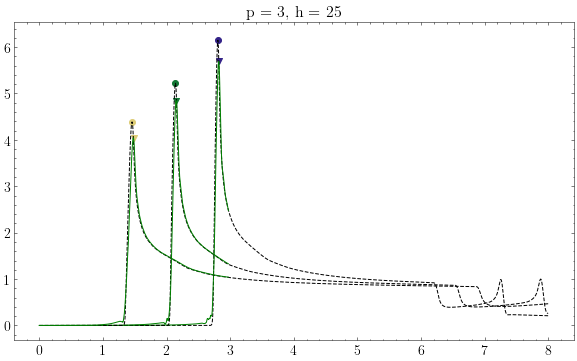

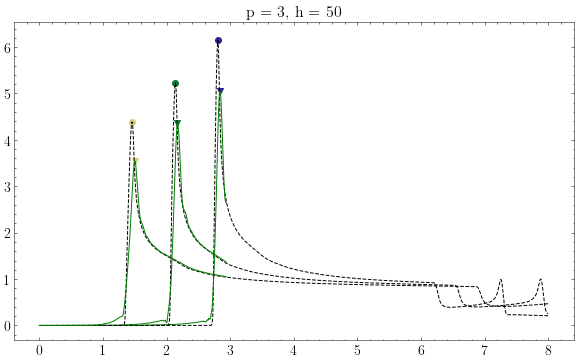

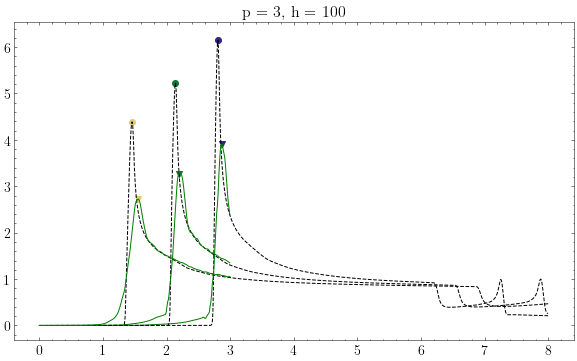

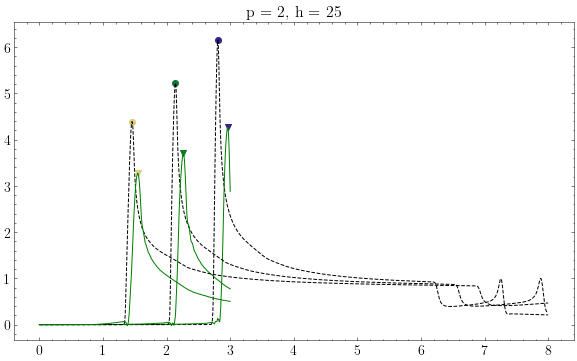

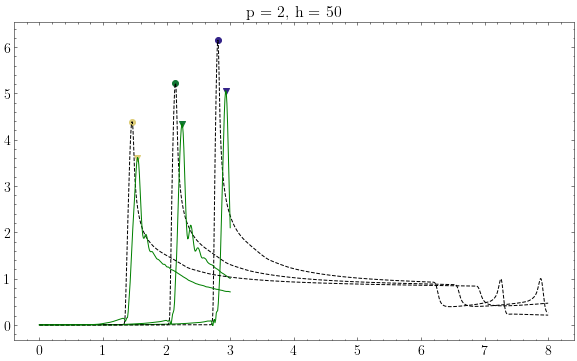

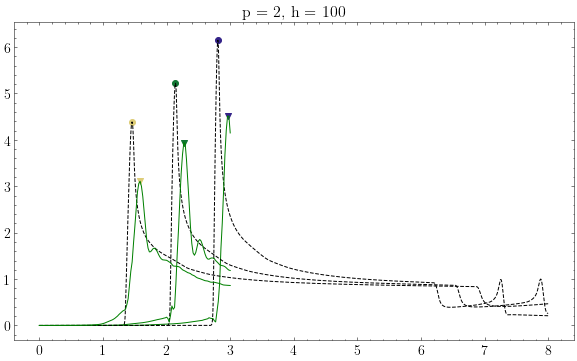

In [56]:

Data = pd.DataFrame(columns=["p","dx", "ReceiverLoc", "TimingDifference", "SlipRateDifference"])

NumReceiver = 3
CutOffFreq = 20

print("Populating Dataframe")
for File_k in Files:
    PlotStuff(Data, path, File_k, RefListTPV, CutOffFreq, NumReceiver)
    #Populate_PandasDF(Data, path, File_k, RefListTPV, CutOffFreq, NumReceiver)
    print("")
    


In [57]:
Data = pd.DataFrame(columns=["p","dx", "ReceiverLoc", "TimingDifference", "SlipRateDifference"])

print("Populating Dataframe")
for File_k in Files:
    Data = Populate_PandasDF(Data, path, File_k, RefListTPV, CutOffFreq, NumReceiver)
    print("")

Populating Dataframe
p = 3 , h = 25
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 25.025]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 25.025]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 25.025]

p = 3 , h = 50
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 50.05]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 50.05]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 50.05]

p = 3 , h = 100
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 100.1]
The TPV3reference object was generated from: SEM2DPACK and the rece

/home/nico/.conda/envs/jane/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Receiver Coords: [6000.0, 50.05]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 50.05]

p = 2 , h = 100
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 8km
Receiver Coords: [8000.0, 100.1]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 6km
Receiver Coords: [6000.0, 100.1]
The TPV3reference object was generated from: SEM2DPACK and the receiver is located at 4km
Receiver Coords: [4000.0, 100.1]



In [58]:
#p1Data = Data[Data.p == 1]
p2Data = Data[Data.p == 2]
p3Data = Data[Data.p == 3]


In [59]:

def Fig7Layout():
    fig = plt.figure( figsize=[8,8])
    gs = GridSpec(2, 2, figure=fig, wspace=0.2, hspace=.3)
    
    gs00 = gs[1, :].subgridspec(1, 2,wspace=0.15, hspace=0.2)
    
    
    
    ax0 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs00[0, 0])
    ax3 = fig.add_subplot(gs00[0, 1])
    
    ax_right = fig.add_subplot(gs00[:]); ax_right.axis('off')

    ax3.set_yticklabels([])
    ax2.set_xlabel("Timing difference [s]")
    ax3.set_xlabel("Timing difference [s]")
    ax2.set_ylabel("Peak slip rate difference [m/s]")
    
    
    ax2.xaxis.set_major_locator(MaxNLocator(5))
    ax2.yaxis.set_major_locator(MaxNLocator(5))
    
    ax3.xaxis.set_major_locator(MaxNLocator(5))
    ax3.yaxis.set_major_locator(MaxNLocator(5))
    
    ax2.grid(True)
    ax3.grid(True)
    
    return fig, ax0,[ax2,ax3]


class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]

In [60]:
def PlotnScatter3ListsColor(axis,x,y,z, cmap,**kwargs):
    for i, txt in enumerate(z):
        axis.scatter(x[i], y[i],color = cmap.colors[i], **kwargs)

/home/nico/.conda/envs/jane/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


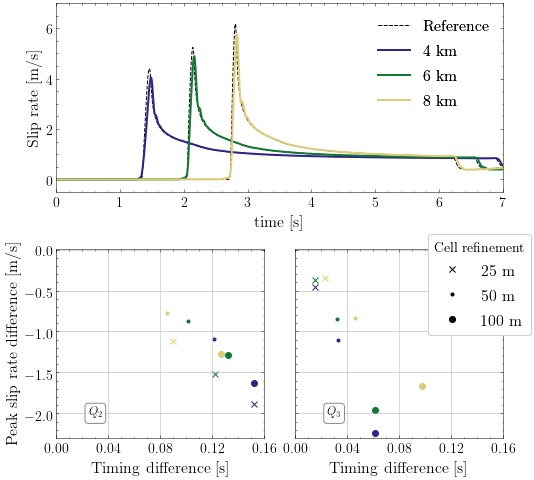

In [61]:
fig,ax0,axis=Fig7Layout()
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

Styles = ['x','.','o']; ColorMarker=['k']*3


for j,PNumData in enumerate([p2Data,p3Data]):
    Loc1Data = PNumData[PNumData.dx == "025m"]
    Loc2Data = PNumData[PNumData.dx == "050m"]
    Loc3Data = PNumData[PNumData.dx == "100m"]

    for idxLoc,LocNumData in enumerate([Loc1Data,Loc2Data,Loc3Data]):
        PlotnScatter3ListsColor(axis[j], 
                                LocNumData.TimingDifference.tolist(),
                                LocNumData.SlipRateDifference.tolist(),
                                LocNumData.ReceiverLoc.tolist(),
                                cmap = cmap,marker=Styles[idxLoc])
    
    # Lines Formatting axis 1
    LinesMarker = zip(ColorMarker,Styles)
    legend2 = axis[1].legend(LinesMarker, ['25 m', '50 m', '100 m'],title='Cell refinement',frameon=True, 
                             handler_map={tuple:MarkerHandler()},
                             loc="lower left", bbox_to_anchor=(0.6,0.5))
    axis[1].add_artist(legend2)
    
    axis[j].text(0.03, -2.0, '$Q_{}$'.format(j+2), ha="center", va="center", size=12,
            bbox=bbox_props)


#####################################################################
# Axis formating
for ax in axis:
    ax.set_xlim(0.0,.16)
    ax.set_ylim(-2.3,.01)


#####################################################################
# AX0 PLOT
path0 = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

ReceiverFile = pd.read_csv(path0+"20201012/TPV3/No6/receiverCP-dr-2400x2400-p3.dat", 
                           comment = '#',header = None, delimiter = " ")
    
PlotReceiverCP_wPandasAtAxis(ReceiverFile, ax0, RefListTPV[2:],CutoffFrequency=CutOffFreq)
ax0.set_xlim(0,7.0)
ax0.set_ylim(-0.5,7.0)
        
        
Lines = ax0.get_lines()[-4:]

legend2 = ax0.legend(Lines, ['Reference', '4 km', '6 km', '8 km'], loc=1)
ax0.add_artist(legend2)

OutFile = "/home/nico/Documents/Documents/SharedWolfel/Works/se2dr_Paper/Illustrations/FinalFigures/F{}.pdf"
fig.savefig(OutFile.format("7"))